## walmart sales EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("./walmart-sales-dataset-of-45stores.csv",parse_dates=['Date'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.shape

(6435, 8)

In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Checking for duplicate value 

In [7]:
data.duplicated().sum()

0

### Univariate Analysis

#### Subplots of data 

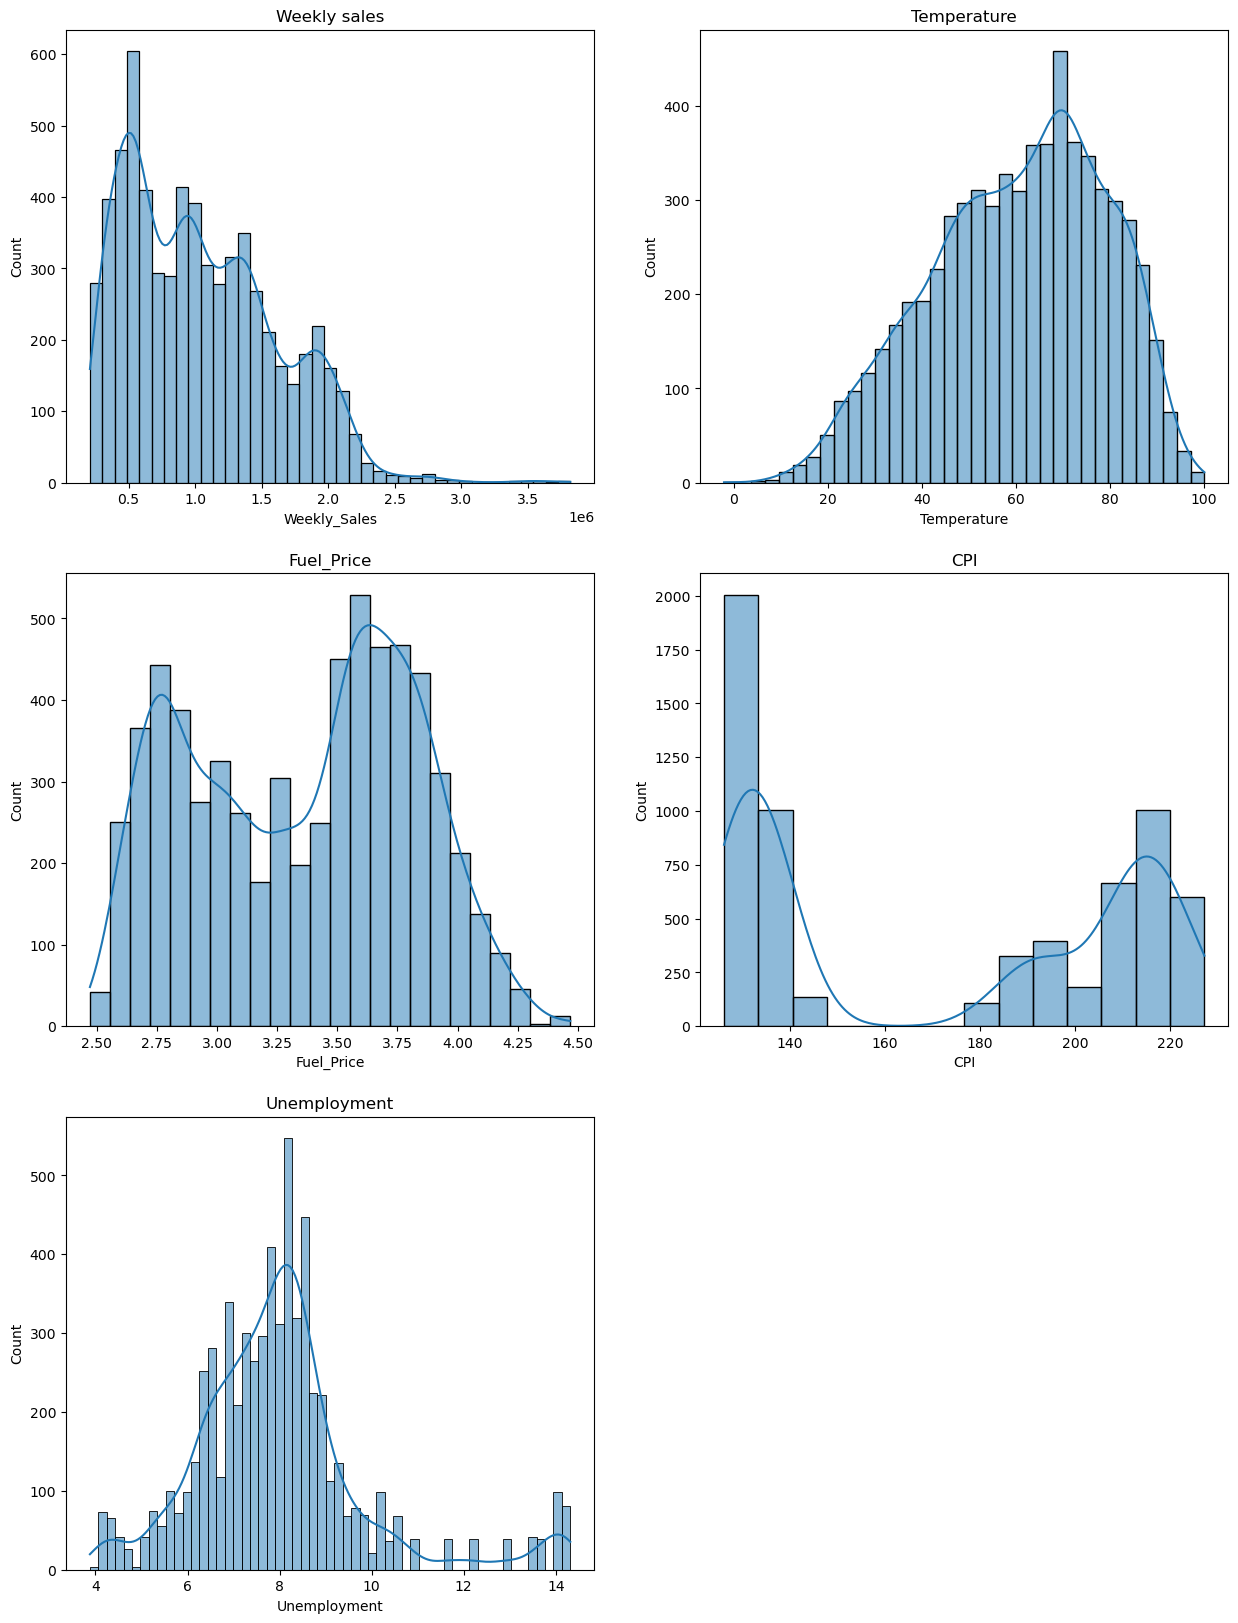

In [8]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.histplot(data=data,x='Weekly_Sales',kde=True)
plt.title("Weekly sales")

plt.subplot(3,2,2)
sns.histplot(data=data,x='Temperature',kde=True)
plt.title("Temperature")


plt.subplot(3,2,3)
sns.histplot(data=data,x='Fuel_Price',kde=True)
plt.title("Fuel_Price")


plt.subplot(3,2,4)
sns.histplot(data=data,x='CPI',kde=True)
plt.title("CPI")

plt.subplot(3,2,5)
sns.histplot(data=data,x='Unemployment',kde=True)
plt.title("Unemployment")

plt.show()

### Box plots 

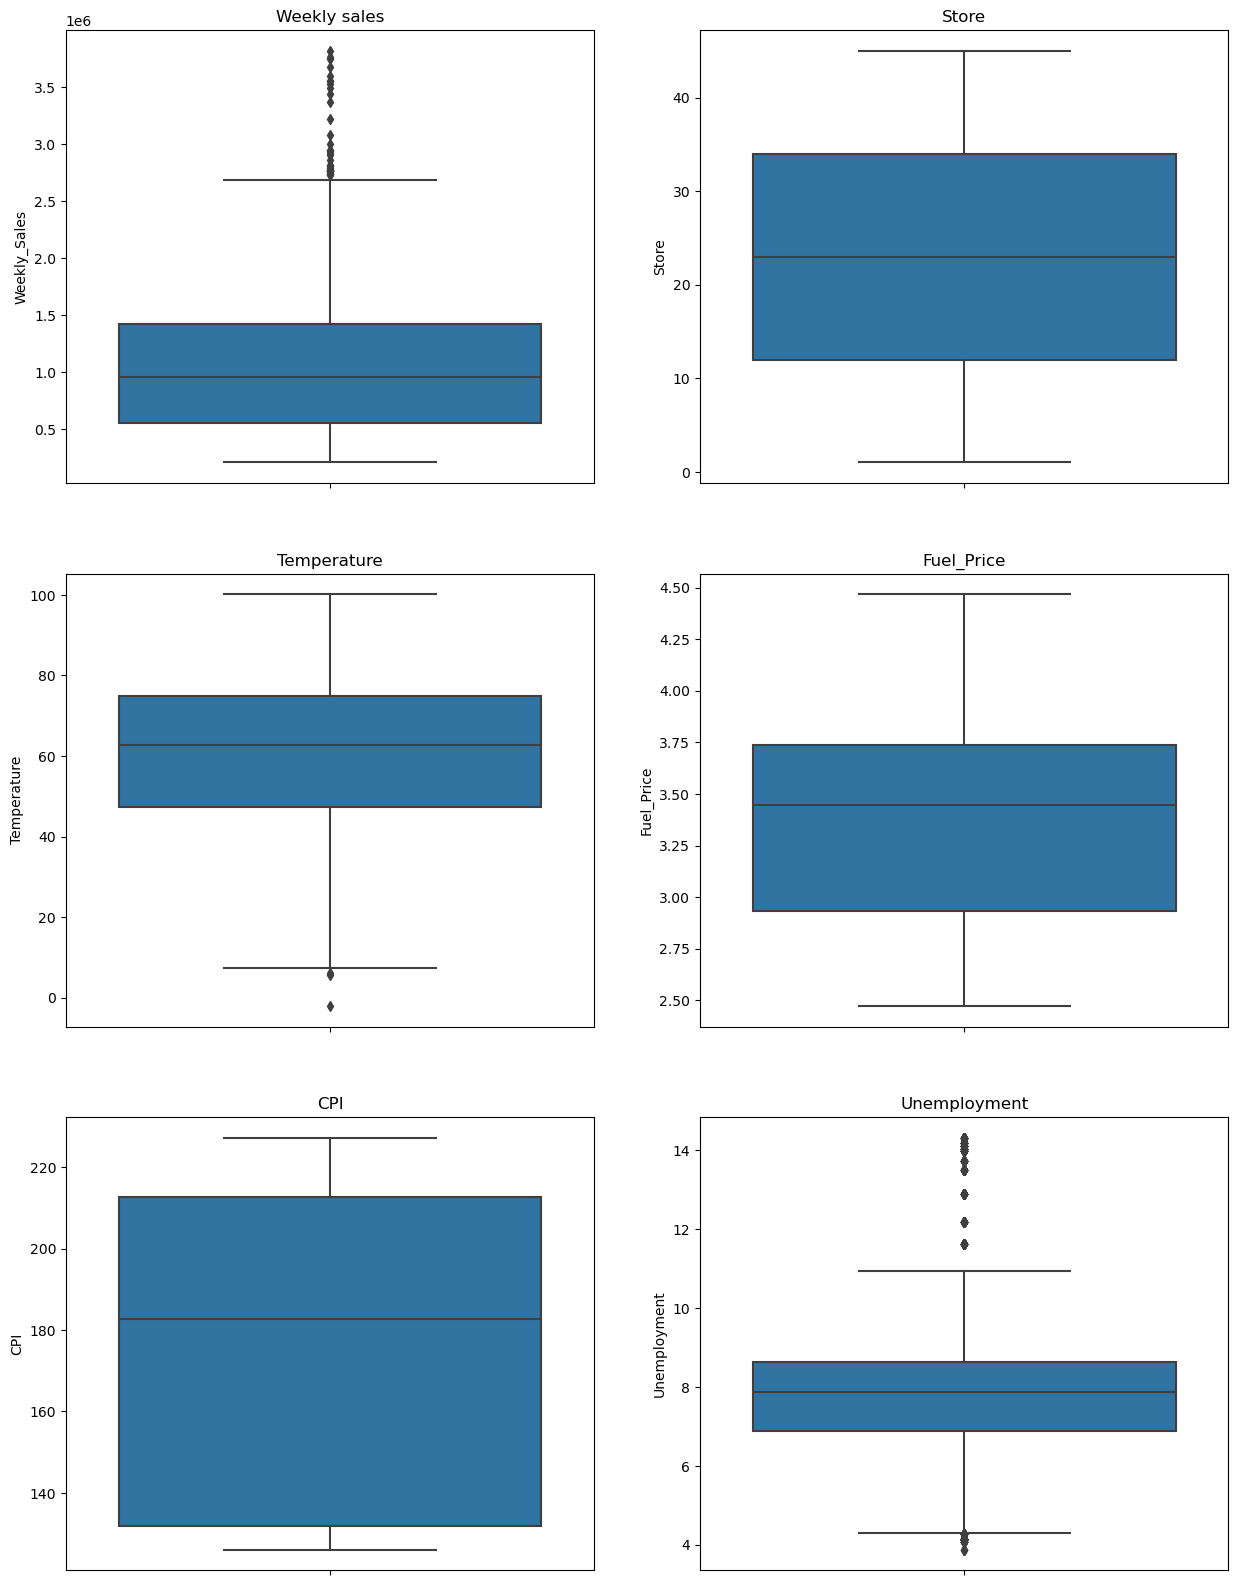

In [9]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.boxplot(data=data,y='Weekly_Sales')
plt.title("Weekly sales")

plt.subplot(3,2,2)
sns.boxplot(data=data,y='Store')
plt.title("Store")

plt.subplot(3,2,3)
sns.boxplot(data=data,y='Temperature')
plt.title("Temperature")


plt.subplot(3,2,4)
sns.boxplot(data=data,y='Fuel_Price')
plt.title("Fuel_Price")


plt.subplot(3,2,5)
sns.boxplot(data=data,y='CPI')
plt.title("CPI")



plt.subplot(3,2,6)
sns.boxplot(data=data,y='Unemployment')

plt.title("Unemployment")

plt.show()

### Lets add new columns from data column

In [10]:
data["year"] = data.Date.dt.year

In [11]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012


In [12]:
data["months"] = data.Date.dt.month
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [13]:
data['months']=data.months.replace({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',
                                8:'august',9:'september',10:'october',11:'november',12:'december'})
data                                  

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,may
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,december
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,february
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,february
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,may
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,september
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,may
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,december
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,october


In [14]:
data["weekday"] = data.Date.dt.day_of_week
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,may,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,december,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,february,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,february,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,may,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,september,4
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,may,3
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,december,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,october,4


In [15]:
data.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,may,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,december,Wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,february,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,february,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,may,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,september,Thursday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,may,Wednesday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,december,Sunday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,october,Thursday


### Barplots 

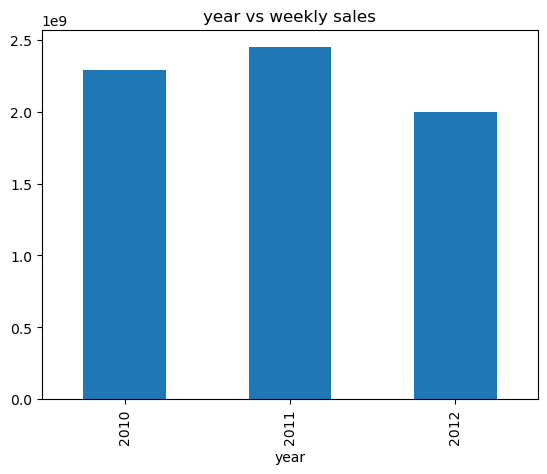

In [16]:
year_sales=data.groupby(['year'])['Weekly_Sales'].sum()
plt.title('year vs weekly sales')
year_sales.plot.bar();


most weekly sales occurs in 2011 and least weekly sales occur in 2012

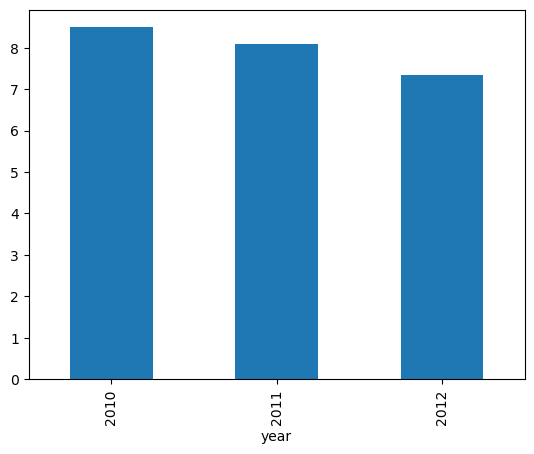

In [17]:
year_unemployment=data.groupby(['year'])['Unemployment'].mean()
year_unemployment.plot.bar();

most unemployment occurs in 2010 and least occurs in 2012

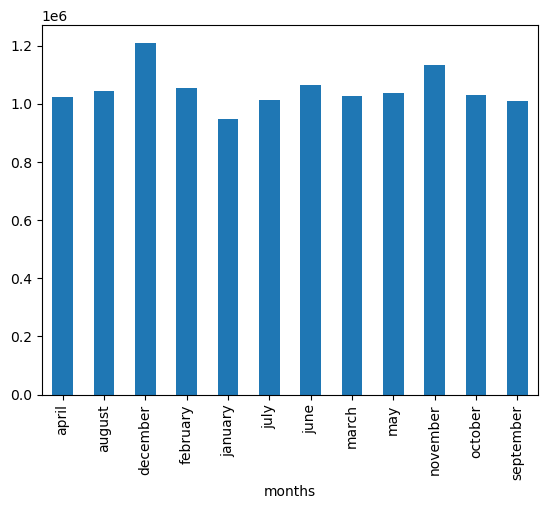

In [18]:
month_weeklysales=data.groupby(['months'])['Weekly_Sales'].mean()
month_weeklysales.plot.bar();

weekly sales most occur month is december

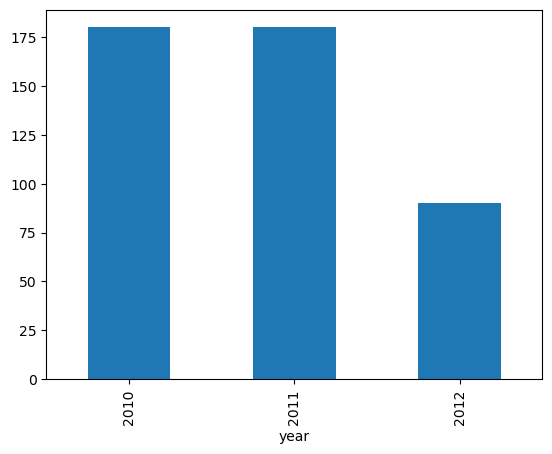

In [19]:
year_holiday=data.groupby(['year'])['Holiday_Flag'].sum()
year_holiday.plot.bar();

Almost 2010 and 2011 as the most holidays 

In [20]:
store_weeklysales=data.groupby(["Weekly_Sales"])["Store"].mean()
store_weeklysales.sort_values(ascending=False,inplace=True)

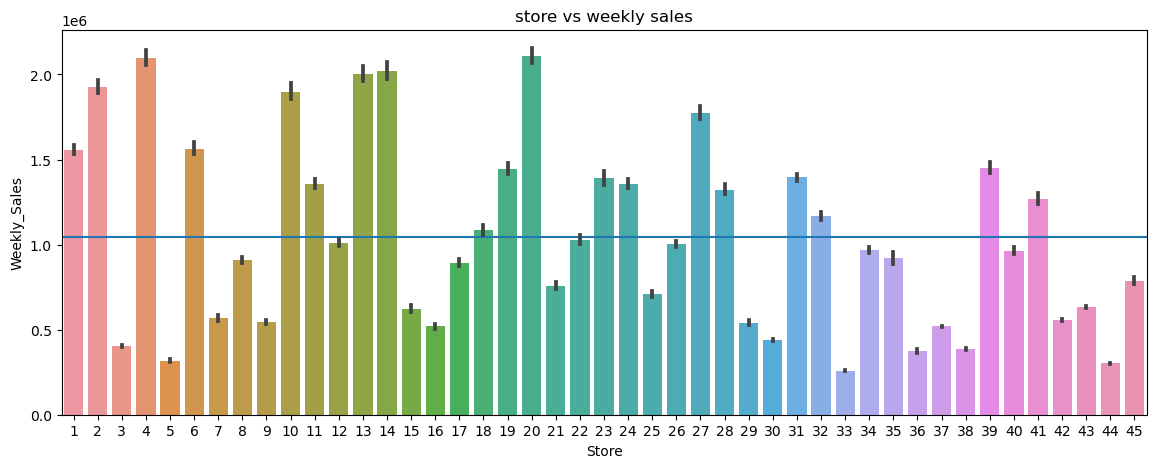

In [21]:
plt.figure(figsize=(14,5))
plt.axhline(data.Weekly_Sales.mean())
plt.title('store vs weekly sales')
sns.barplot(y='Weekly_Sales', x='Store', data=data)
plt.show()

Highest weekly sales occur in store 20

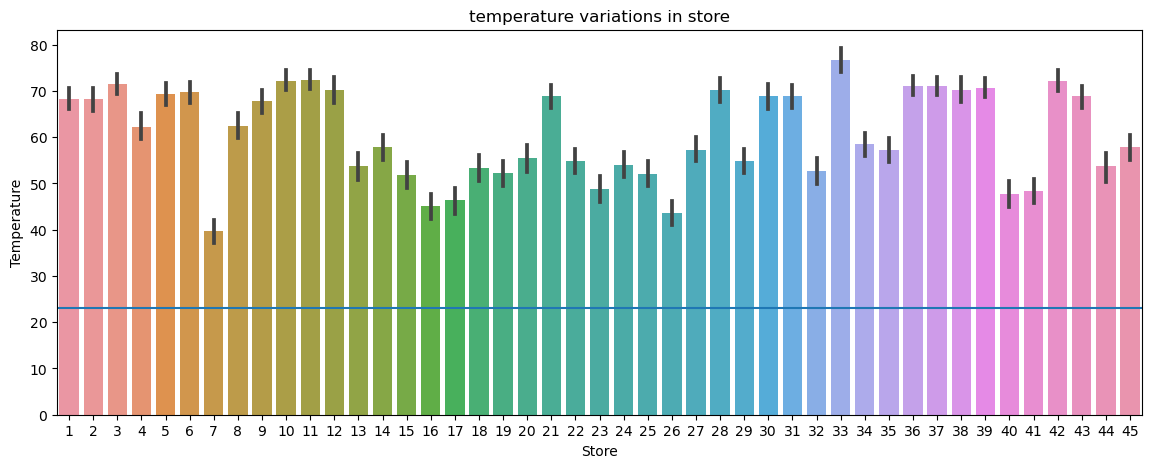

In [22]:
plt.figure(figsize=(14,5))
plt.title("temperature variations in store")
plt.axhline(data.Store.mean())
sns.barplot(y='Temperature', x='Store', data=data)
plt.show()

store 33 as the highest temperature

### Line plots 

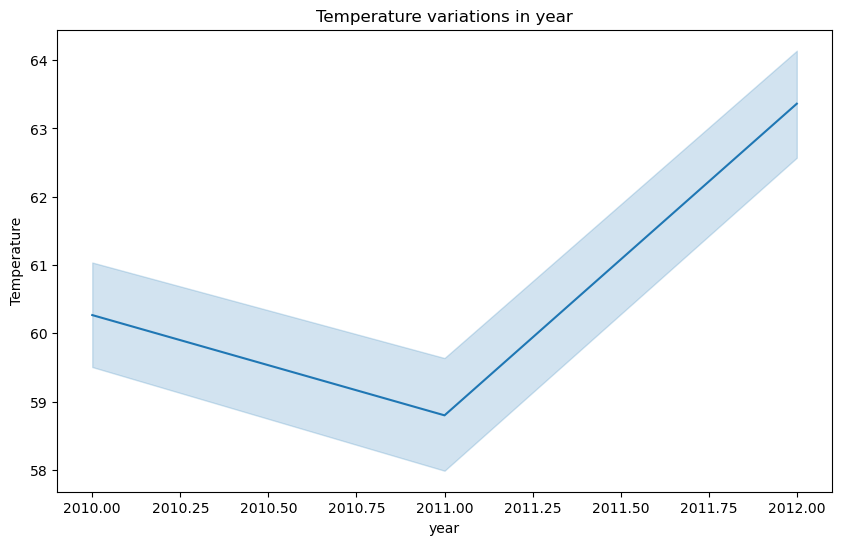

In [23]:
plt.figure(figsize=(10,6))
plt.xlabel('year')
plt.ylabel('Temperature')
plt.title('Temperature variations in year')
sns.lineplot(data=data,x='year',y='Temperature')
plt.show()

Temperature increases rapidly from 2011 to 2012

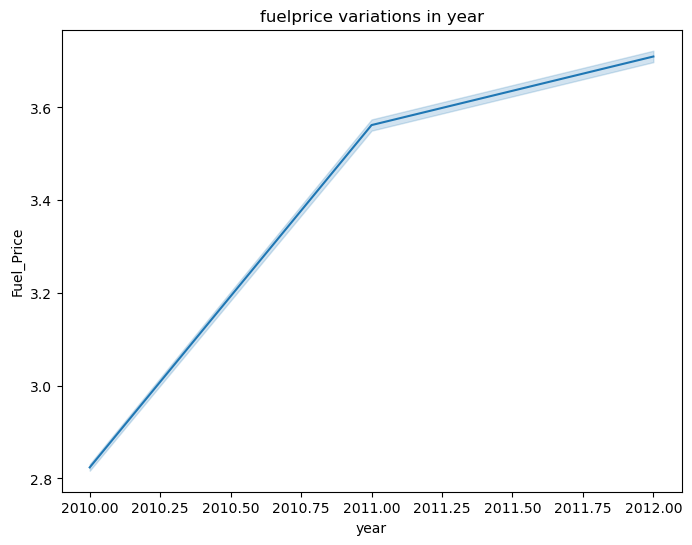

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('year')
plt.ylabel('Fuel_Price')
plt.title('fuelprice variations in year')
sns.lineplot(data=data,x='year',y='Fuel_Price')
plt.show()

 fuelprice increases rapidly from 2011 

### Pie chart 

### pie chart of week day 

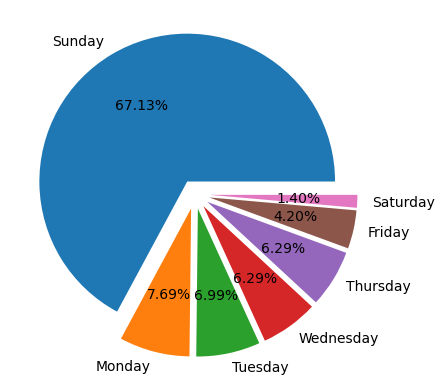

In [25]:
plt.pie(data=data,\
       x=data.weekday.value_counts(),\
       explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],\
       labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],\
       autopct='%0.2f%%');

 average weekly sales in all stores

In [26]:
average_weekly_sales=data.groupby(['Store'])['Weekly_Sales'].mean()
average_weekly_sales

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

In [27]:
average_weekly_sales.nlargest(1)

Store
20    2.107677e+06
Name: Weekly_Sales, dtype: float64

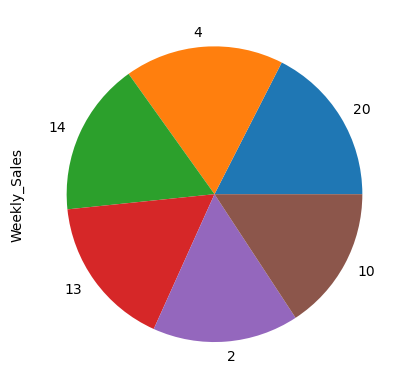

In [28]:
average_weekly_sales.nlargest(6).plot.pie();

average weekly sales is in store 20

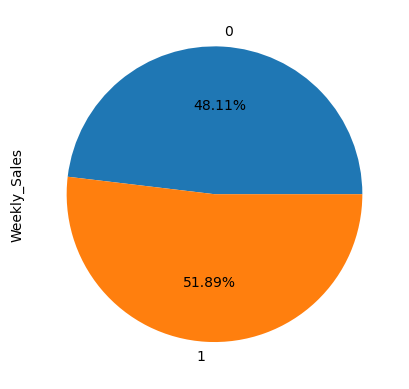

In [29]:
holiday_sales=data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()
holiday_sales.plot.pie(autopct="%1.2f%%");

most weekly sales occur in holidays

### Sorting the dataframe based on the date 

In [30]:
data.sort_values(by="Date",inplace=True)
data.reset_index(drop=True,inplace=True)

In [31]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months,weekday
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,january,Saturday
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,january,Saturday
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,january,Saturday
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,january,Saturday
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,january,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,2012,december,Sunday
6431,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,2012,december,Sunday
6432,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,december,Sunday
6433,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,2012,december,Sunday


### Countplot of Holiday flag 

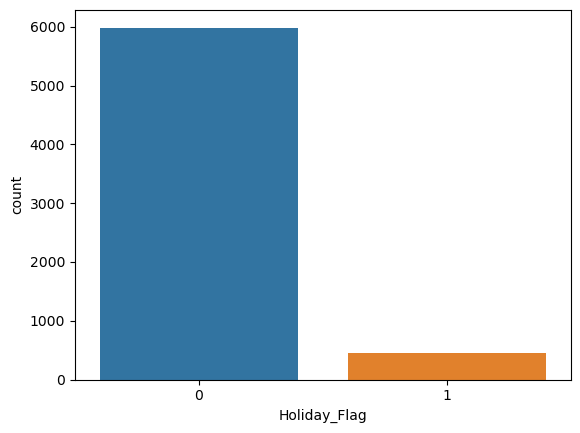

In [32]:
sns.countplot(x='Holiday_Flag',data=data)
plt.show()

Less holidays are there

### Line charts 

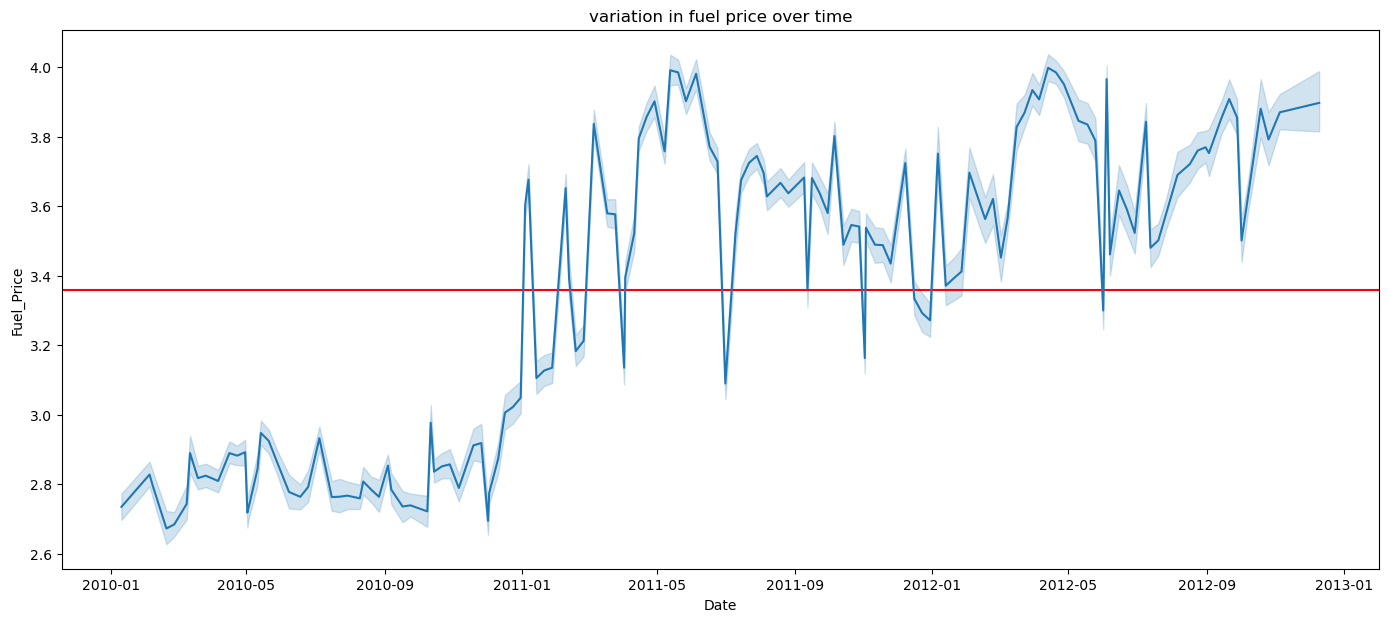

In [33]:
plt.figure(figsize=(17,7))
plt.axhline(y=data.Fuel_Price.mean(),color='r')
sns.lineplot(x='Date',y='Fuel_Price',data=data)
plt.title("variation in fuel price over time")
plt.show()

2011 to 2013 the variation in fuel price increases over time

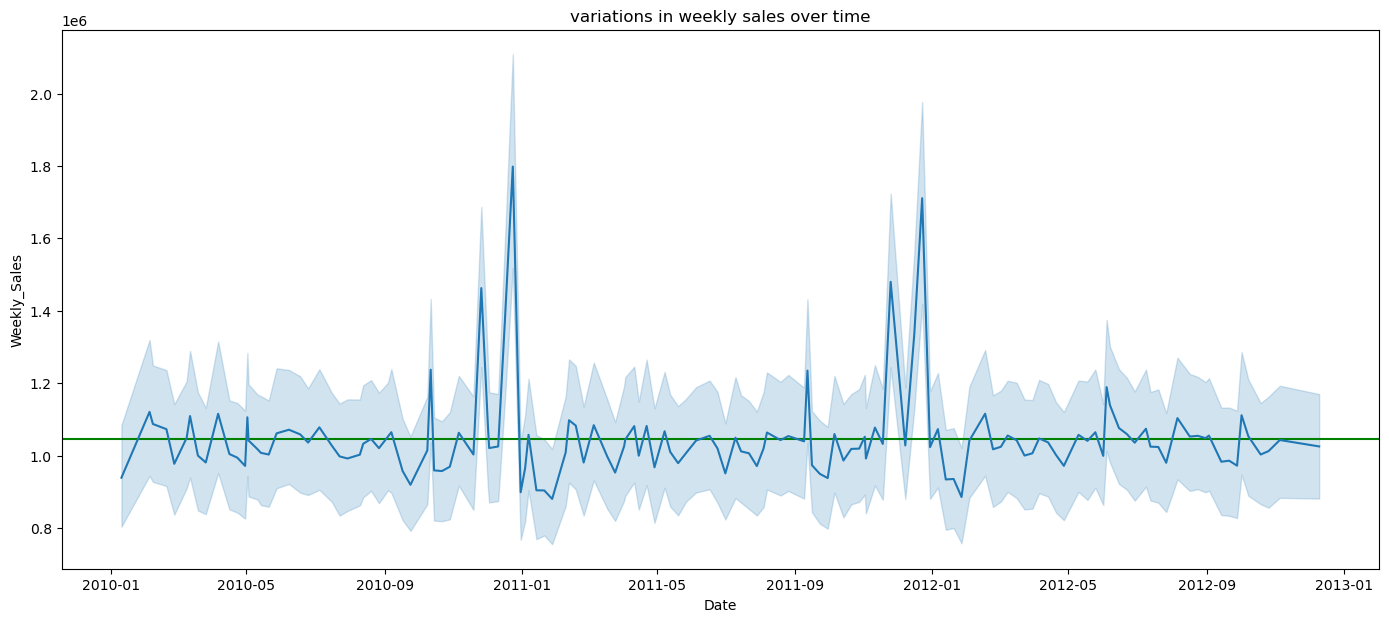

In [34]:
plt.figure(figsize=(17,7))
plt.axhline(y=data.Weekly_Sales.mean(),color='g')
sns.lineplot(x='Date',y='Weekly_Sales',data=data)
plt.title('variations in weekly sales over time')
plt.show()

2011 and 2012 years occur more variations in weekly sales over time

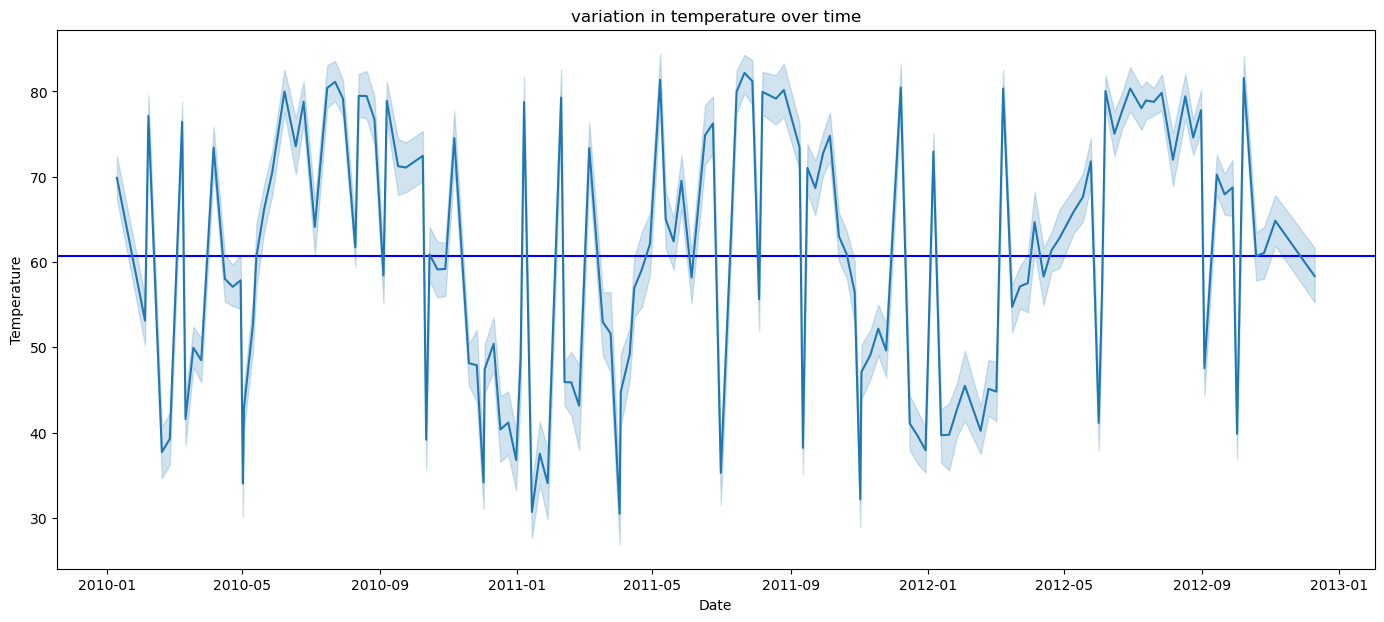

In [35]:
plt.figure(figsize=(17,7))
plt.axhline(y=data.Temperature.mean(),color='b')
sns.lineplot(x='Date',y='Temperature',data=data)
plt.title("variation in temperature over time")
plt.show()

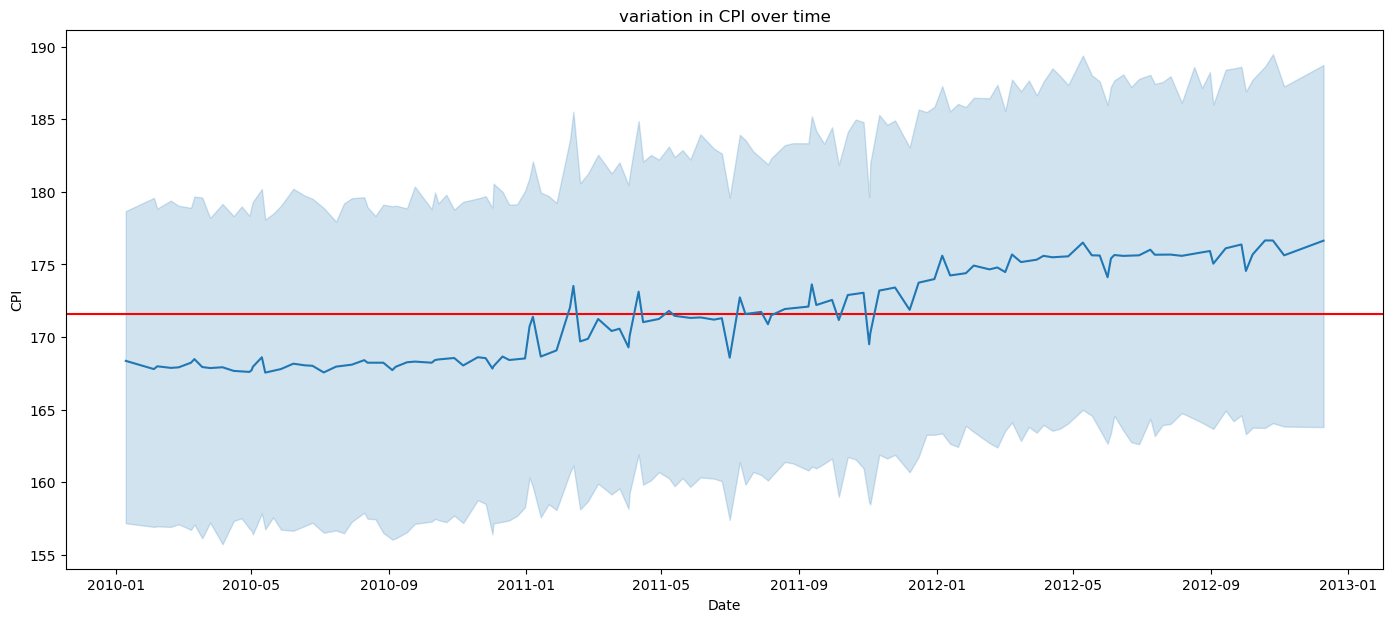

In [36]:
plt.figure(figsize=(17,7))
plt.axhline(y=data.CPI.mean(),color='r')
sns.lineplot(x='Date',y='CPI',data=data)
plt.title("variation in CPI over time")
plt.show()

2011 to 2013 CPI increases over time

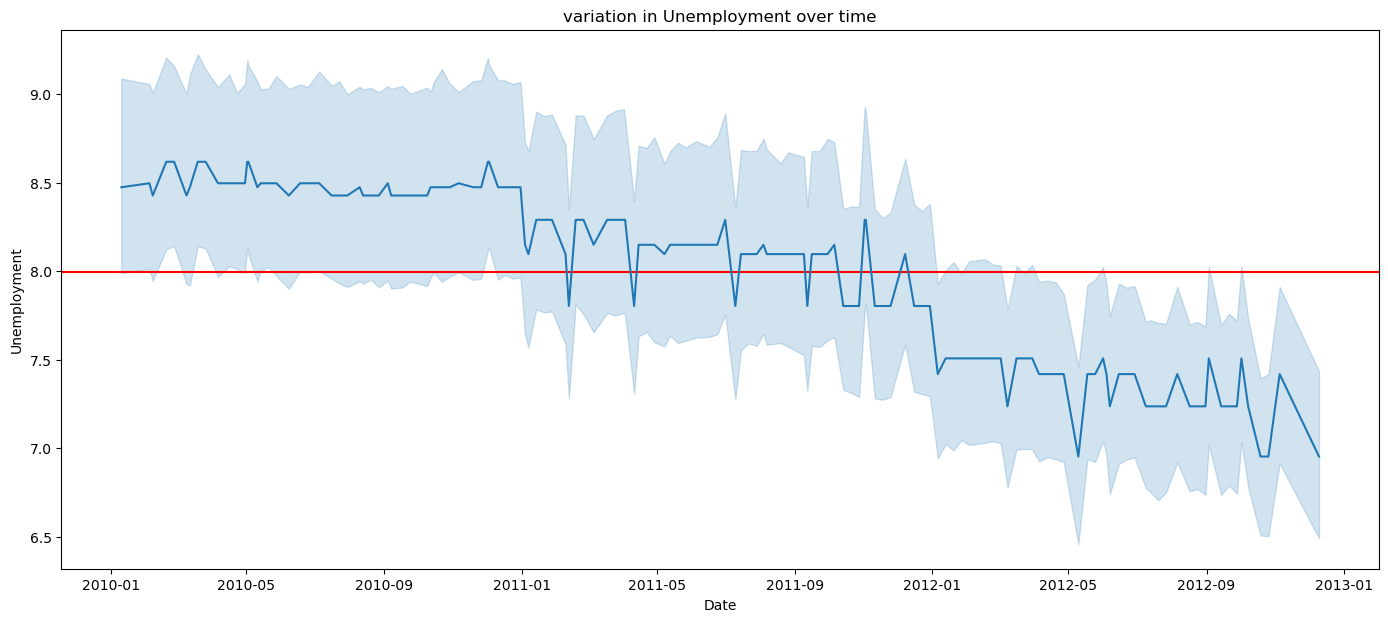

In [37]:
plt.figure(figsize=(17,7))
plt.axhline(y=data.Unemployment.mean(),color='r')
sns.lineplot(x='Date',y='Unemployment',data=data)
plt.title("variation in Unemployment over time")
plt.show()

unemployment decreases in  2012 to 2013 over time 

### Scatter plots 

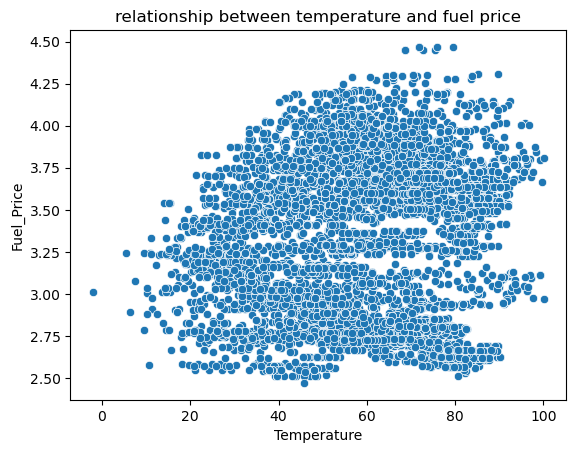

In [38]:
sns.scatterplot(x='Temperature',y='Fuel_Price',data=data)
plt.title("relationship between temperature and fuel price")
plt.show()

There is no correlation between temperature and fuel price

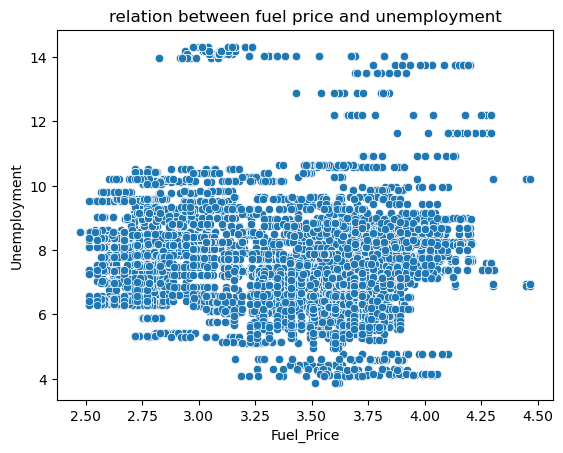

In [39]:
sns.scatterplot(data=data,x="Fuel_Price",y="Unemployment")
plt.title("relation between fuel price and unemployment")
plt.show()

There is no correlation between fuel price and unemployment

### Reg plots

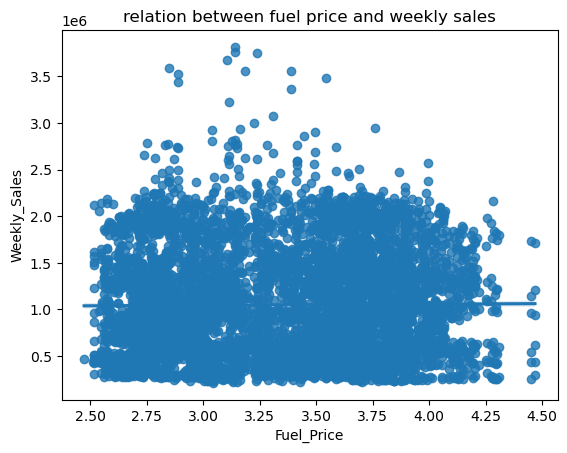

In [40]:
sns.regplot(x='Fuel_Price',y='Weekly_Sales',data=data)
plt.title("relation between fuel price and weekly sales")
plt.show()

There is no correlation between fuel price and weekly sales

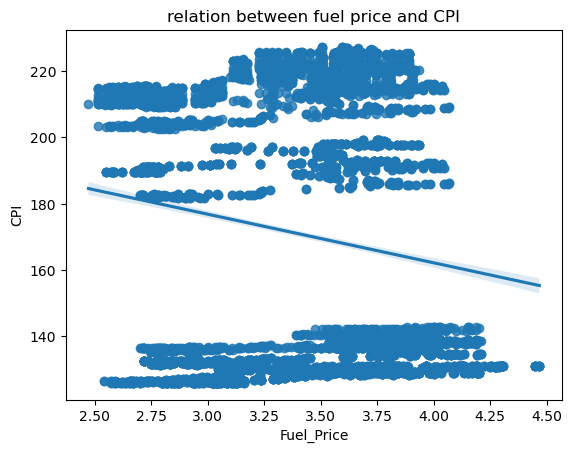

In [41]:
sns.regplot(x='Fuel_Price',y='CPI',data=data)
plt.title("relation between fuel price and CPI")
plt.show()

There is a very weak negative correlation between fuel price and CPI 

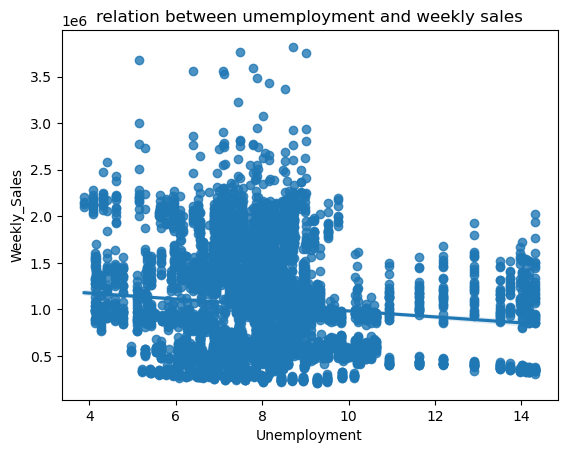

In [42]:
sns.regplot(x='Unemployment',y='Weekly_Sales',data=data)
plt.title("relation between umemployment and weekly sales")
plt.show()

There is no correlation between unemployment and weekly sales

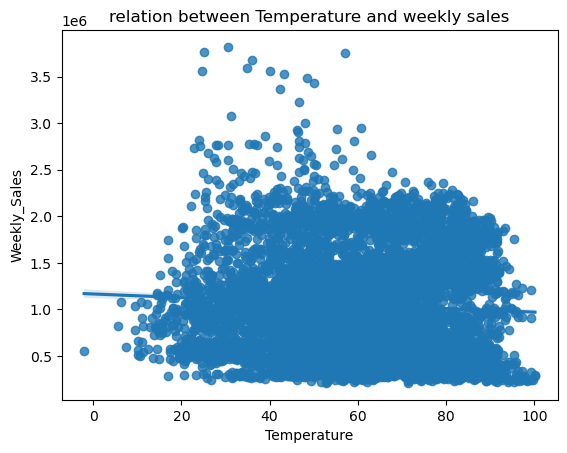

In [43]:
sns.regplot(x='Temperature',y='Weekly_Sales',data=data)
plt.title("relation between Temperature and weekly sales")
plt.show()

There is no correlation between temperature and weekly sales

### Year wise plots 

In [52]:
year_2010=data[data.year==2010]
year_2011=data[data.year==2011]
year_2012=data[data.year==2012]

In [53]:
year_2010.drop(columns='year',inplace=True)
year_2011.drop(columns='year',inplace=True)
year_2012.drop(columns='year',inplace=True)

In [46]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months,weekday
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,january,Saturday
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,january,Saturday
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,january,Saturday
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,january,Saturday
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,january,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,2012,december,Sunday
6431,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,2012,december,Sunday
6432,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,december,Sunday
6433,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,2012,december,Sunday


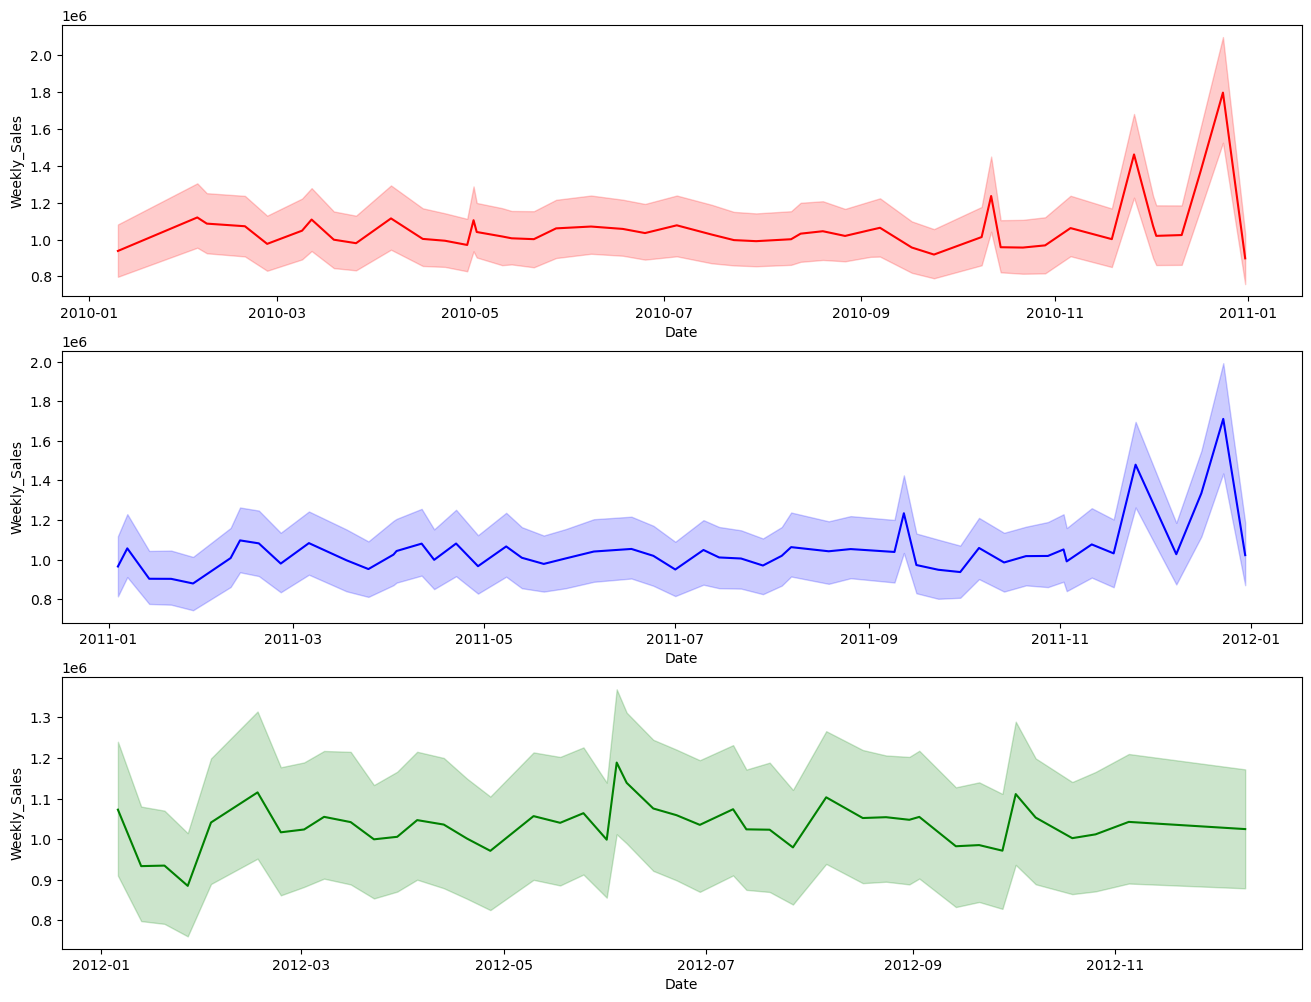

In [54]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)

sns.lineplot(x='Date',y='Weekly_Sales',data=year_2010,color='r')

plt.subplot(3,1,2)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2011,color='b')

plt.subplot(3,1,3)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2012,color='g')

plt.show()

### Yearly sales from each stores 

In [48]:
yearly_sales_stores=data.groupby(['Store','year'])['Weekly_Sales'].sum()
yearly_sales_stores=yearly_sales_stores.reset_index()
yearly_sales_stores

,Store,year,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42
...,...,...,...
130,44,2011,15498194.67
131,44,2012,14187373.72
132,45,2010,38536343.37
133,45,2011,41135367.88


In [59]:
yearly_sales_stores.nlargest(7,'Weekly_Sales')

,Store,year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08
57,20,2010,1.017331e+08
28,10,2011,9.891689e+07


### Top stores in each year

In [56]:
yearly_sales_stores_2010=yearly_sales_stores[yearly_sales_stores.year==2010]
yearly_sales_stores_2011=yearly_sales_stores[yearly_sales_stores.year==2011]
yearly_sales_stores_2012=yearly_sales_stores[yearly_sales_stores.year==2012]

In [65]:
yearly_sales_stores_2010_sorting=yearly_sales_stores_2010.sort_values(by='Weekly_Sales',ascending=False)[:7]

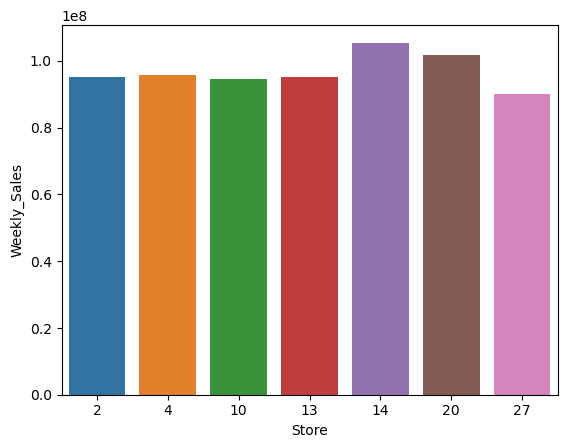

In [66]:
sns.barplot(data=yearly_sales_stores_2010_sorting,x='Store',y='Weekly_Sales')
plt.show()

store 14 is the most weekly sales store in 2010

#### In 2011 which is the most weekly sales store? 

In [67]:
yearly_sales_stores_2011_sorting=yearly_sales_stores_2011.sort_values(by='Weekly_Sales',ascending=False)[:7]

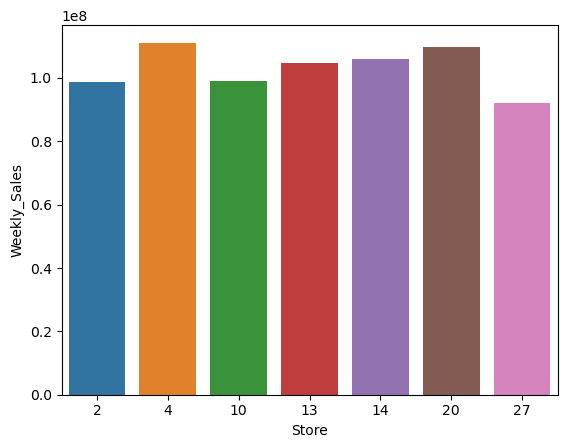

In [68]:
sns.barplot(data=yearly_sales_stores_2011_sorting,x='Store',y='Weekly_Sales')
plt.show()

Store 4 is the most weekly sales store in 2011

#### In 2012  which is the most weekly sales store?

In [69]:
yearly_sales_stores_2012_sorting=yearly_sales_stores_2012.sort_values(by='Weekly_Sales',ascending=False)[:7]

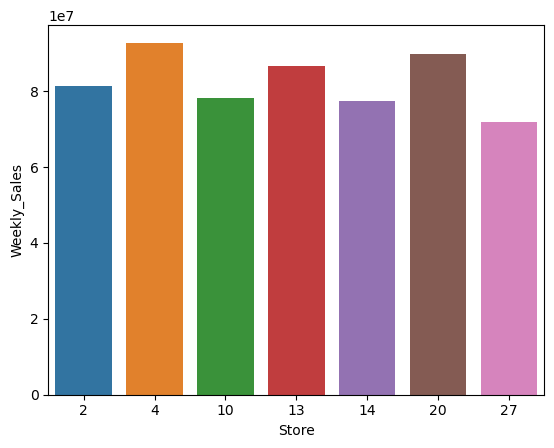

In [70]:
sns.barplot(data=yearly_sales_stores_2012_sorting,x='Store',y='Weekly_Sales')
plt.show()

Store 4 is the most weekly sales store in 2012

### Temperature conversion 

In [71]:
data['celsius']=[(Temp-32)*(5/9) for Temp in data.Temperature]

### Lets create a new column called Heat 

In [72]:
data['Heat']=pd.cut(x=data.celsius,bins=[-20,10,35],labels=['cold','warm'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,months,weekday,celsius,Heat
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,january,Saturday,21.722222,warm
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,january,Saturday,15.383333,warm
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,january,Saturday,30.005556,warm
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,january,Saturday,33.027778,warm
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,january,Saturday,23.700000,warm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,2012,december,Sunday,4.100000,cold
6431,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,2012,december,Sunday,6.255556,cold
6432,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,december,Sunday,24.461111,warm
6433,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,2012,december,Sunday,6.522222,cold


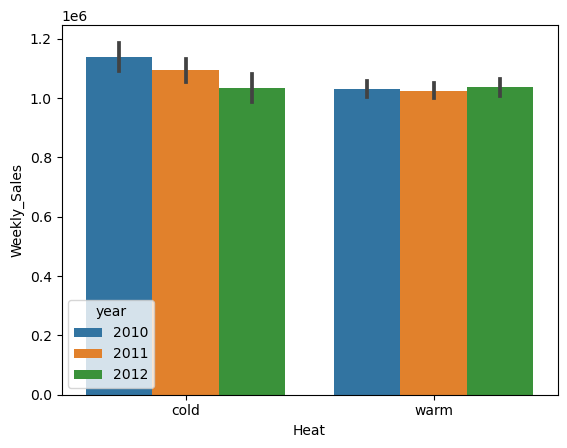

In [75]:
sns.barplot(x='Heat',y='Weekly_Sales',hue='year',data=data)
plt.show()

 In 2010,most weekly sales at cold season 

### Heatmap 

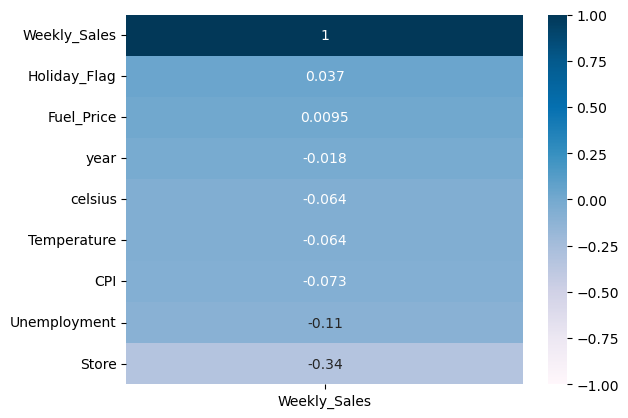

In [78]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False),vmin=-1,vmax=1,annot=True,cmap='PuBu')
plt.show()

### Plotting from pivot tables 

In [79]:
monthly_sales=pd.pivot_table(data=data,values='Weekly_Sales',index='months',
                             columns='year')
monthly_sales

year,2010,2011,2012
months,,,
april,1.021177e+06,1.033220e+06,1.014127e+06
august,1.025212e+06,1.044895e+06,1.064514e+06
december,1.198413e+06,1.274311e+06,1.025078e+06
february,1.064372e+06,1.042273e+06,1.057997e+06
january,9.386639e+05,9.420697e+05,9.567817e+05
july,1.023702e+06,9.976049e+05,1.025480e+06
june,1.055082e+06,1.038471e+06,1.082920e+06
march,1.034590e+06,1.011263e+06,1.025510e+06
may,1.039303e+06,1.015565e+06,1.053948e+06


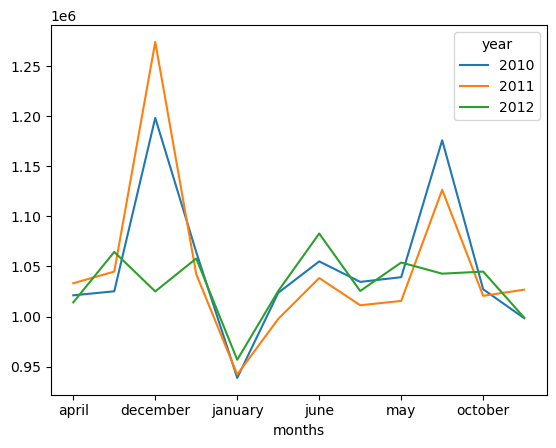

In [80]:
monthly_sales.plot();